In [1]:
## Import Packages
import numpy as np
import scipy.stats as stats
import os
import pickle
import scipy.io as scio
from ncdump_python3 import ncdump
import pickle
import Area_Avg
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import warnings
warnings.filterwarnings('ignore')

In [4]:
Source_File = Dataset('Kernels/Interpolated/CAM3_Kernels.nc')

#Load in Dimensions

#WACCM4 Horizontal Resolution grid
LLL = Dataset('LatLon.nc')
WACCM4_Lat = np.squeeze(LLL.variables['lat'])
WACCM4_Lon = np.squeeze(LLL.variables['lon'])
LLL.close()

#CAM3 Horizontal resolution grid
CAM3_Lat = np.squeeze(Source_File.variables['lat'])
CAM3_Lon = np.squeeze(Source_File.variables['lon'])

#Lists for iterating
Months = np.arange(0,12)
FP_Ensemble_Members = np.arange(0,5)

In [5]:
#load kernel
CAM3_ALB_Kernel = np.squeeze(Source_File.variables['Alb_TOA'])

In [6]:
#load climate change responses
wAVD_dALB = pickle.load(open(\
    "Future Projection CC Responses/wAVD_dALB.pickle","rb"),encoding='latin1')
wAVD_dALB_CAM3Grid = pickle.load(open(\
    "Future Projection CC Responses/wAVD_dALB_CAM3Grid.pickle","rb"),encoding='latin1')
wAVD_dALB_CAM3Grid = np.swapaxes(wAVD_dALB_CAM3Grid,2,3)
wAVD_dST = pickle.load(open(\
    "Future Projection CC Responses/wAVD_dST.pickle","rb"),encoding='latin1')
wAVD_dST_CAM3Grid = pickle.load(open(\
    "Future Projection CC Responses/wAVD_dST_CAM3Grid.pickle","rb"),encoding='latin1')
wAVD_dST_CAM3Grid = np.swapaxes(wAVD_dST_CAM3Grid,2,3)

#Mask all Climate change responses where Nan's exist and mulitply to get percentage change
wAVD_dALB = np.ma.masked_invalid(wAVD_dALB)*100
wAVD_dALB_CAM3Grid = np.ma.masked_invalid(wAVD_dALB_CAM3Grid)*100

In [8]:
#Calculate Albedo Energy Budget Perturbation via Multiplying the climate change response
    #by the kernel
CAM3_wAVD_ALB_EnergyB = np.ma.zeros([FP_Ensemble_Members.size,Months.size,\
    CAM3_Lat.size,CAM3_Lon.size])

for i in range(FP_Ensemble_Members.size):    
    CAM3_wAVD_ALB_EnergyB[i,:,:,:] = np.ma.multiply(\
    wAVD_dALB_CAM3Grid[i,:,:,:],CAM3_ALB_Kernel)

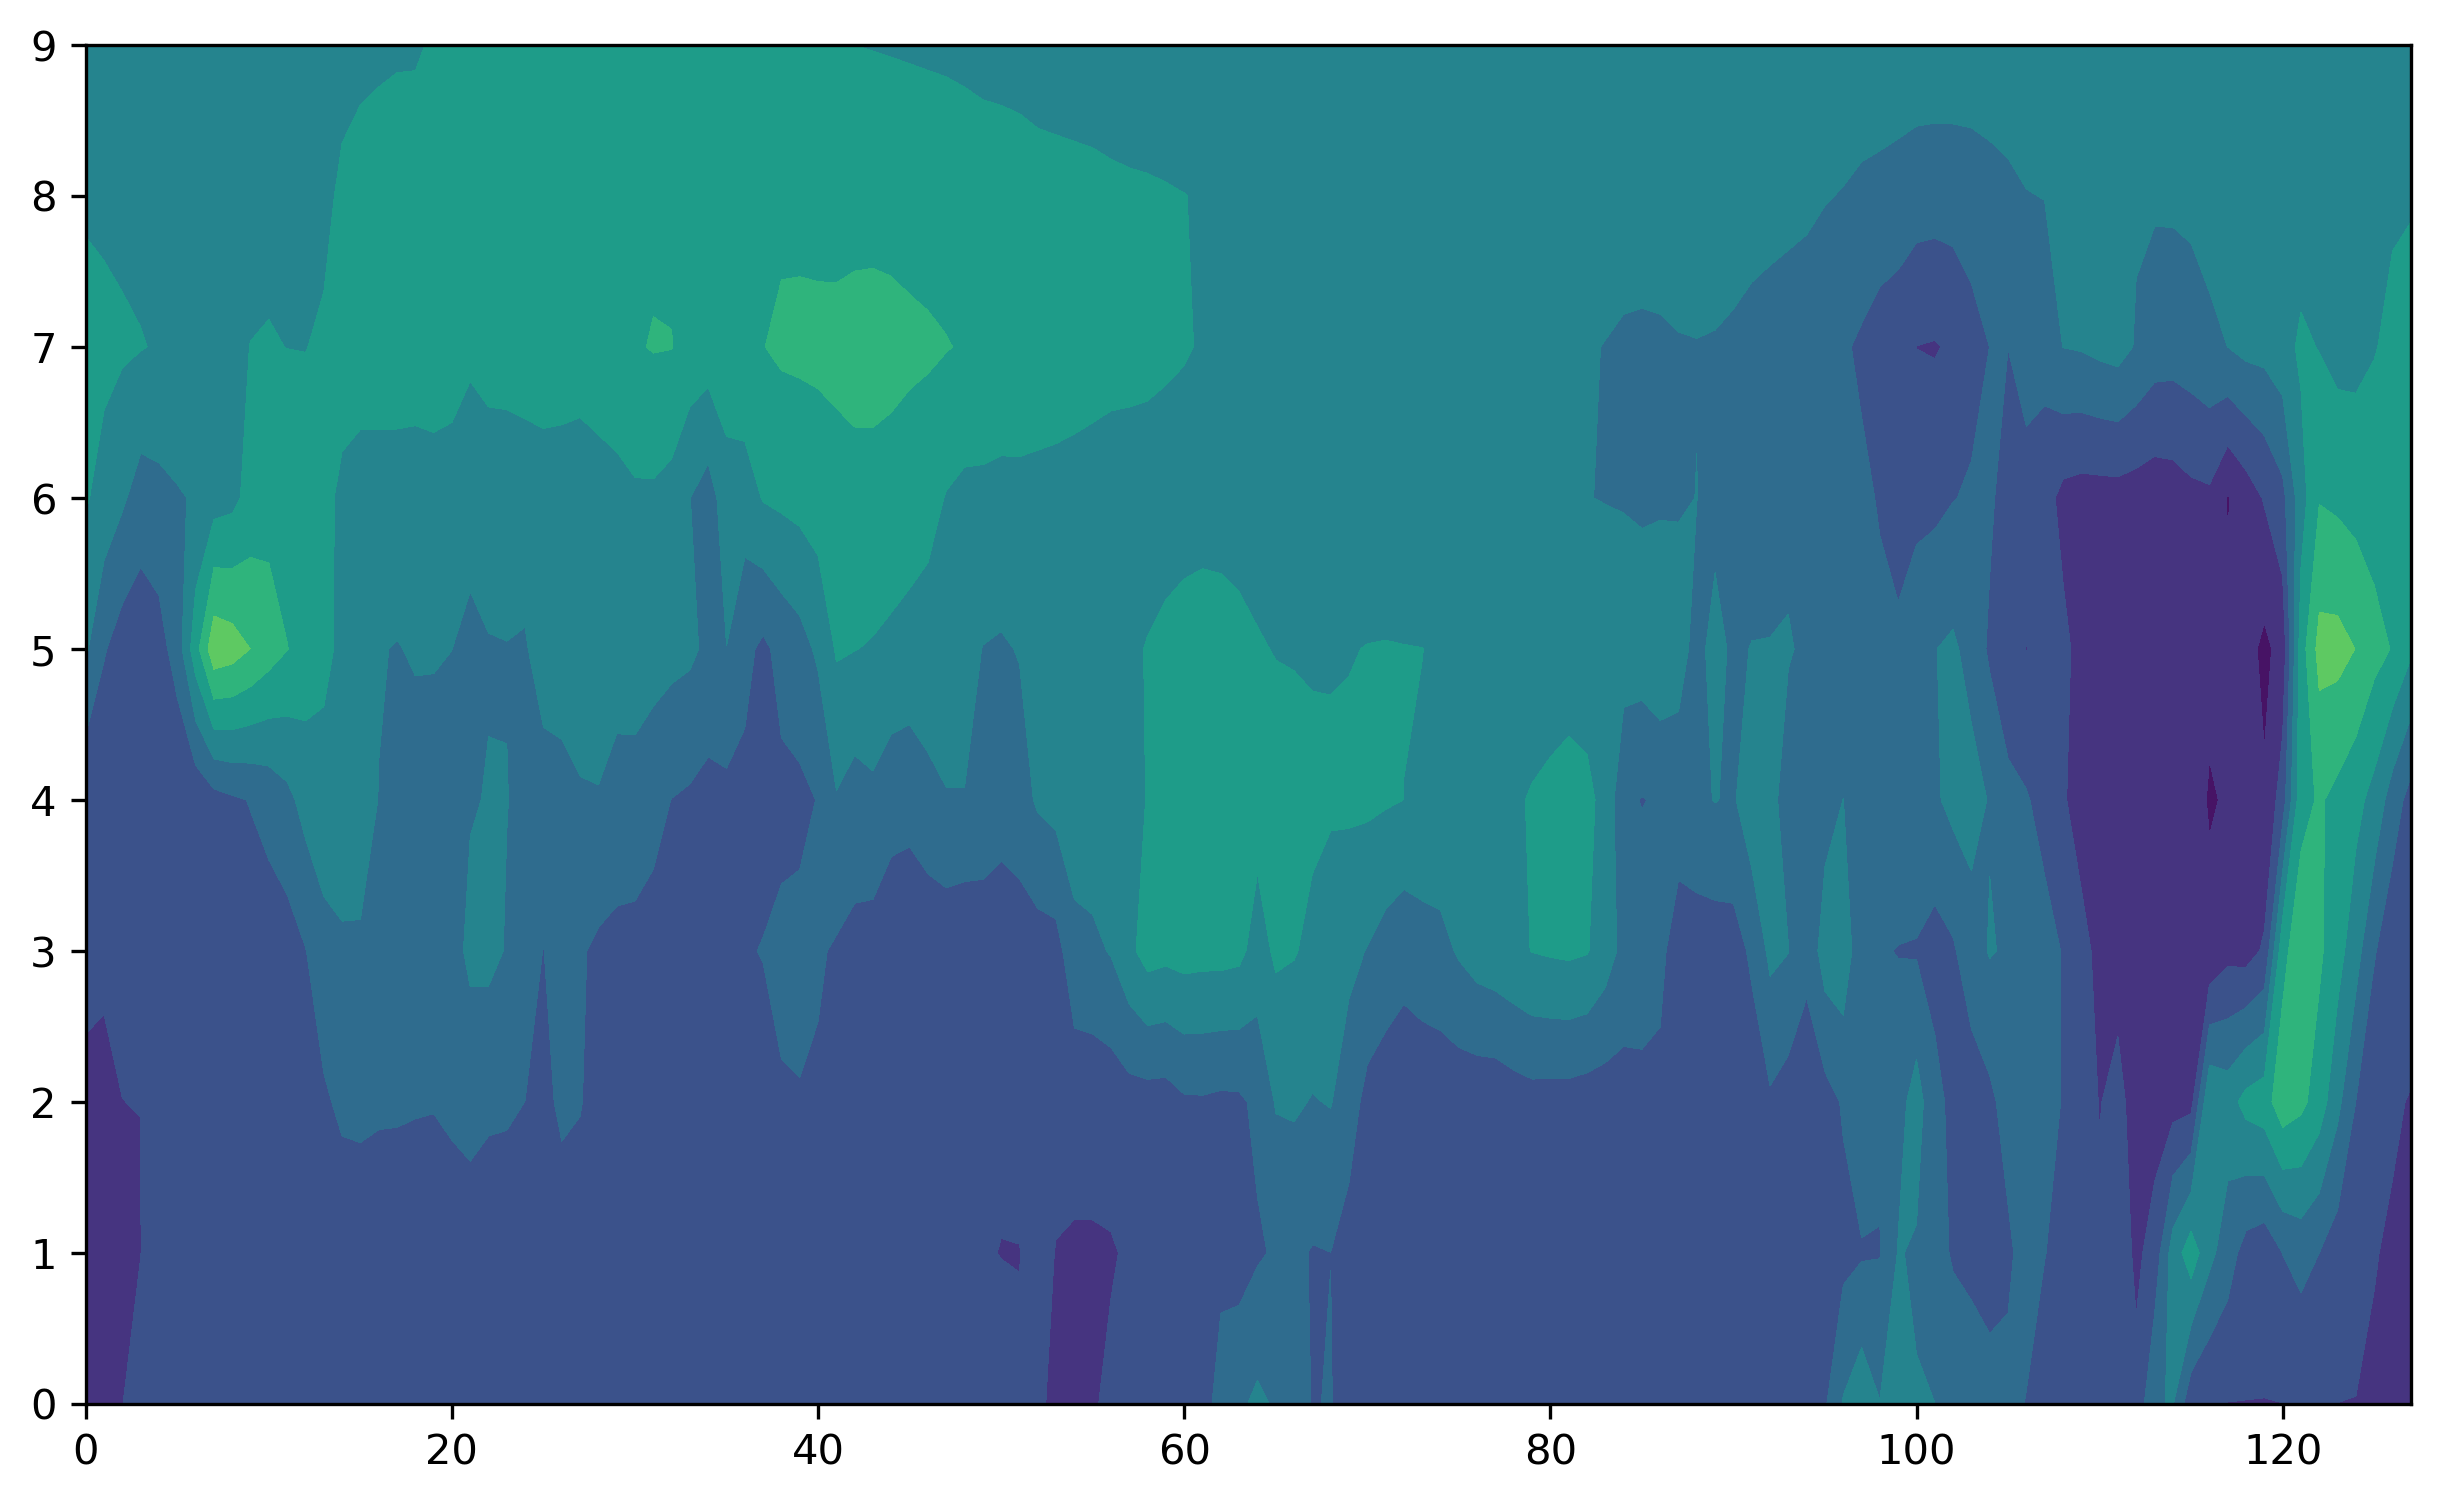

In [23]:
fig = plt.figure(figsize=(10, 6),dpi=300)

plt.contourf(np.ma.mean(CAM3_wAVD_ALB_EnergyB[:,:,54:,:],axis=(0,1)))
plt.clim(-5,20)

In [15]:
#Season Split
CAM3_wAVD_ALB_EnergyB_SON = CAM3_wAVD_ALB_EnergyB[:,8:11,:,:]
CAM3_wAVD_ALB_EnergyB_JJA = CAM3_wAVD_ALB_EnergyB[:,5:8,:,:]
CAM3_wAVD_ALB_EnergyB_MAM = CAM3_wAVD_ALB_EnergyB[:,2:5,:,:]
CAM3_wAVD_ALB_EnergyB_DJF_1 = CAM3_wAVD_ALB_EnergyB[:,0:2,:,:]
CAM3_wAVD_ALB_EnergyB_DJF_2 = np.expand_dims(CAM3_wAVD_ALB_EnergyB[:,11,:,:],axis=1)
CAM3_wAVD_ALB_EnergyB_DJF = np.concatenate((CAM3_wAVD_ALB_EnergyB_DJF_1,\
                                         CAM3_wAVD_ALB_EnergyB_DJF_2),axis=1)

CAM3_wAVD_dST_SON = wAVD_dST_CAM3Grid[:,8:11,:,:]
CAM3_wAVD_dST_JJA = wAVD_dST_CAM3Grid[:,5:8,:,:]
CAM3_wAVD_dST_MAM = wAVD_dST_CAM3Grid[:,2:5,:,:]
CAM3_wAVD_dST_DJF_1 = wAVD_dST_CAM3Grid[:,0:2,:,:]
CAM3_wAVD_dST_DJF_2 = np.expand_dims(wAVD_dST_CAM3Grid[:,11,:,:],axis=1)
CAM3_wAVD_dST_DJF = np.concatenate((CAM3_wAVD_dST_DJF_1,\
                                         CAM3_wAVD_dST_DJF_2),axis=1)

In [16]:
#Area Average Variables
CAM3_wAVD_ALB_EnergyB_Annual_AA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_ALB_EnergyB_SON_AA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_ALB_EnergyB_JJA_AA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_ALB_EnergyB_MAM_AA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_ALB_EnergyB_DJF_AA = np.zeros([FP_Ensemble_Members.size])

CAM3_wAVD_dST_Annual_AA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_dST_SON_AA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_dST_JJA_AA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_dST_MAM_AA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_dST_DJF_AA = np.zeros([FP_Ensemble_Members.size])

for i in range(FP_Ensemble_Members.size):
    CAM3_wAVD_ALB_EnergyB_Annual_AA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_ALB_EnergyB[i,:,54:,:],CAM3_Lat[54:],CAM3_Lon),axis=0)
    CAM3_wAVD_ALB_EnergyB_SON_AA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_ALB_EnergyB_SON[i,:,54:,:],CAM3_Lat[54:],CAM3_Lon),axis=0)
    CAM3_wAVD_ALB_EnergyB_JJA_AA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_ALB_EnergyB_JJA[i,:,54:,:],CAM3_Lat[54:],CAM3_Lon),axis=0)
    CAM3_wAVD_ALB_EnergyB_MAM_AA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_ALB_EnergyB_MAM[i,:,54:,:],CAM3_Lat[54:],CAM3_Lon),axis=0)
    CAM3_wAVD_ALB_EnergyB_DJF_AA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_ALB_EnergyB_DJF[i,:,54:,:],CAM3_Lat[54:],CAM3_Lon),axis=0)

    CAM3_wAVD_dST_Annual_AA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            wAVD_dST_CAM3Grid[i,:,54:,:],CAM3_Lat[54:],CAM3_Lon),axis=0)
    CAM3_wAVD_dST_SON_AA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_dST_SON[i,:,54:,:],CAM3_Lat[54:],CAM3_Lon),axis=0)
    CAM3_wAVD_dST_JJA_AA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_dST_JJA[i,:,54:,:],CAM3_Lat[54:],CAM3_Lon),axis=0)
    CAM3_wAVD_dST_MAM_AA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_dST_MAM[i,:,54:,:],CAM3_Lat[54:],CAM3_Lon),axis=0)
    CAM3_wAVD_dST_DJF_AA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_dST_DJF[i,:,54:,:],CAM3_Lat[54:],CAM3_Lon),axis=0)

In [17]:
CAM3_wAVD_ALB_Feedback_Annual_AA = CAM3_wAVD_ALB_EnergyB_Annual_AA/\
                                        CAM3_wAVD_dST_Annual_AA
CAM3_wAVD_ALB_Feedback_SON_AA = CAM3_wAVD_ALB_EnergyB_SON_AA/CAM3_wAVD_dST_SON_AA
CAM3_wAVD_ALB_Feedback_JJA_AA = CAM3_wAVD_ALB_EnergyB_JJA_AA/CAM3_wAVD_dST_JJA_AA
CAM3_wAVD_ALB_Feedback_MAM_AA = CAM3_wAVD_ALB_EnergyB_MAM_AA/CAM3_wAVD_dST_MAM_AA
CAM3_wAVD_ALB_Feedback_DJF_AA = CAM3_wAVD_ALB_EnergyB_DJF_AA/CAM3_wAVD_dST_DJF_AA

In [20]:
CAM3_wAVD_ALB_Feedback_Annual_AA

array([0.69516136, 0.69676223, 0.65243167, 0.66793639, 0.63832967])

In [19]:
CAM3_wAVD_ALB_EnergyB_JJA_AA

array([7.37967252, 7.15825943, 6.4737644 , 6.9950837 , 7.75738247])

In [24]:
#Area Average Variables
CAM3_wAVD_ALB_EnergyB_Annual_GA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_ALB_EnergyB_SON_GA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_ALB_EnergyB_JJA_GA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_ALB_EnergyB_MAM_GA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_ALB_EnergyB_DJF_GA = np.zeros([FP_Ensemble_Members.size])

CAM3_wAVD_dST_Annual_GA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_dST_SON_GA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_dST_JJA_GA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_dST_MAM_GA = np.zeros([FP_Ensemble_Members.size])
CAM3_wAVD_dST_DJF_GA = np.zeros([FP_Ensemble_Members.size])

for i in range(FP_Ensemble_Members.size):
    CAM3_wAVD_ALB_EnergyB_Annual_GA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_ALB_EnergyB[i,:,:,:],CAM3_Lat[:],CAM3_Lon),axis=0)
    CAM3_wAVD_ALB_EnergyB_SON_GA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_ALB_EnergyB_SON[i,:,:,:],CAM3_Lat[:],CAM3_Lon),axis=0)
    CAM3_wAVD_ALB_EnergyB_JJA_GA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_ALB_EnergyB_JJA[i,:,:,:],CAM3_Lat[:],CAM3_Lon),axis=0)
    CAM3_wAVD_ALB_EnergyB_MAM_GA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_ALB_EnergyB_MAM[i,:,:,:],CAM3_Lat[:],CAM3_Lon),axis=0)
    CAM3_wAVD_ALB_EnergyB_DJF_GA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_ALB_EnergyB_DJF[i,:,:,:],CAM3_Lat[:],CAM3_Lon),axis=0)

    CAM3_wAVD_dST_Annual_GA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            wAVD_dST_CAM3Grid[i,:,:,:],CAM3_Lat[:],CAM3_Lon),axis=0)
    CAM3_wAVD_dST_SON_GA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_dST_SON[i,:,:,:],CAM3_Lat[:],CAM3_Lon),axis=0)
    CAM3_wAVD_dST_JJA_GA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_dST_JJA[i,:,:,:],CAM3_Lat[:],CAM3_Lon),axis=0)
    CAM3_wAVD_dST_MAM_GA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_dST_MAM[i,:,:,:],CAM3_Lat[:],CAM3_Lon),axis=0)
    CAM3_wAVD_dST_DJF_GA[i] = np.mean(Area_Avg.LatLonavg_Time(\
            CAM3_wAVD_dST_DJF[i,:,:,:],CAM3_Lat[:],CAM3_Lon),axis=0)

In [25]:
CAM3_wAVD_ALB_Feedback_Annual_GA = CAM3_wAVD_ALB_EnergyB_Annual_GA/\
                                        CAM3_wAVD_dST_Annual_GA
CAM3_wAVD_ALB_Feedback_SON_GA = CAM3_wAVD_ALB_EnergyB_SON_GA/CAM3_wAVD_dST_SON_GA
CAM3_wAVD_ALB_Feedback_JJA_GA = CAM3_wAVD_ALB_EnergyB_JJA_GA/CAM3_wAVD_dST_JJA_GA
CAM3_wAVD_ALB_Feedback_MAM_GA = CAM3_wAVD_ALB_EnergyB_MAM_GA/CAM3_wAVD_dST_MAM_GA
CAM3_wAVD_ALB_Feedback_DJF_GA = CAM3_wAVD_ALB_EnergyB_DJF_GA/CAM3_wAVD_dST_DJF_GA

In [70]:
CAM3_wAVD_ALB_EnergyB_Annual_AA_file = open("CAM3_wAVD_ALB_EnergyB_AA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_EnergyB_Annual_AA,CAM3_wAVD_ALB_EnergyB_Annual_AA_file)
CAM3_wAVD_ALB_EnergyB_Annual_AA_file.close()

CAM3_wAVD_ALB_EnergyB_SON_AA_file = open("CAM3_wAVD_ALB_EnergyB_SON_AA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_EnergyB_SON_AA,CAM3_wAVD_ALB_EnergyB_SON_AA_file)
CAM3_wAVD_ALB_EnergyB_SON_AA_file.close()

CAM3_wAVD_ALB_EnergyB_JJA_AA_file = open("CAM3_wAVD_ALB_EnergyB_JJA_AA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_EnergyB_JJA_AA,CAM3_wAVD_ALB_EnergyB_JJA_AA_file)
CAM3_wAVD_ALB_EnergyB_JJA_AA_file.close()

CAM3_wAVD_ALB_EnergyB_MAM_AA_file = open("CAM3_wAVD_ALB_EnergyB_MAM_AA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_EnergyB_MAM_AA,CAM3_wAVD_ALB_EnergyB_MAM_AA_file)
CAM3_wAVD_ALB_EnergyB_MAM_AA_file.close()

CAM3_wAVD_ALB_EnergyB_DJF_AA_file = open("CAM3_wAVD_ALB_EnergyB_DJF_AA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_EnergyB_DJF_AA,CAM3_wAVD_ALB_EnergyB_DJF_AA_file)
CAM3_wAVD_ALB_EnergyB_DJF_AA_file.close()

In [71]:
CAM3_wAVD_ALB_Feedback_Annual_AA_file = open("CAM3_wAVD_ALB_Feedback_AA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_Feedback_Annual_AA,CAM3_wAVD_ALB_Feedback_Annual_AA_file)
CAM3_wAVD_ALB_Feedback_Annual_AA_file.close()

CAM3_wAVD_ALB_Feedback_SON_AA_file = open("CAM3_wAVD_ALB_Feedback_SON_AA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_Feedback_SON_AA,CAM3_wAVD_ALB_Feedback_SON_AA_file)
CAM3_wAVD_ALB_Feedback_SON_AA_file.close()

CAM3_wAVD_ALB_Feedback_JJA_AA_file = open("CAM3_wAVD_ALB_Feedback_JJA_AA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_Feedback_JJA_AA,CAM3_wAVD_ALB_Feedback_JJA_AA_file)
CAM3_wAVD_ALB_Feedback_JJA_AA_file.close()

CAM3_wAVD_ALB_Feedback_MAM_AA_file = open("CAM3_wAVD_ALB_Feedback_MAM_AA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_Feedback_MAM_AA,CAM3_wAVD_ALB_Feedback_MAM_AA_file)
CAM3_wAVD_ALB_Feedback_MAM_AA_file.close()

CAM3_wAVD_ALB_Feedback_DJF_AA_file = open("CAM3_wAVD_ALB_Feedback_DJF_AA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_Feedback_DJF_AA,CAM3_wAVD_ALB_Feedback_DJF_AA_file)
CAM3_wAVD_ALB_Feedback_DJF_AA_file.close()

In [27]:
CAM3_wAVD_ALB_EnergyB_Annual_GA_file = open("CAM3_wAVD_ALB_EnergyB_GA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_EnergyB_Annual_GA,CAM3_wAVD_ALB_EnergyB_Annual_GA_file)
CAM3_wAVD_ALB_EnergyB_Annual_GA_file.close()

CAM3_wAVD_ALB_EnergyB_SON_GA_file = open("CAM3_wAVD_ALB_EnergyB_SON_GA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_EnergyB_SON_GA,CAM3_wAVD_ALB_EnergyB_SON_GA_file)
CAM3_wAVD_ALB_EnergyB_SON_GA_file.close()

CAM3_wAVD_ALB_EnergyB_JJA_GA_file = open("CAM3_wAVD_ALB_EnergyB_JJA_GA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_EnergyB_JJA_GA,CAM3_wAVD_ALB_EnergyB_JJA_GA_file)
CAM3_wAVD_ALB_EnergyB_JJA_GA_file.close()

CAM3_wAVD_ALB_EnergyB_MAM_GA_file = open("CAM3_wAVD_ALB_EnergyB_MAM_GA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_EnergyB_MAM_GA,CAM3_wAVD_ALB_EnergyB_MAM_GA_file)
CAM3_wAVD_ALB_EnergyB_MAM_GA_file.close()

CAM3_wAVD_ALB_EnergyB_DJF_GA_file = open("CAM3_wAVD_ALB_EnergyB_DJF_GA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_EnergyB_DJF_GA,CAM3_wAVD_ALB_EnergyB_DJF_GA_file)
CAM3_wAVD_ALB_EnergyB_DJF_GA_file.close()

In [28]:
CAM3_wAVD_ALB_Feedback_Annual_GA_file = open("CAM3_wAVD_ALB_Feedback_GA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_Feedback_Annual_GA,CAM3_wAVD_ALB_Feedback_Annual_GA_file)
CAM3_wAVD_ALB_Feedback_Annual_GA_file.close()

CAM3_wAVD_ALB_Feedback_SON_GA_file = open("CAM3_wAVD_ALB_Feedback_SON_GA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_Feedback_SON_GA,CAM3_wAVD_ALB_Feedback_SON_GA_file)
CAM3_wAVD_ALB_Feedback_SON_GA_file.close()

CAM3_wAVD_ALB_Feedback_JJA_GA_file = open("CAM3_wAVD_ALB_Feedback_JJA_GA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_Feedback_JJA_GA,CAM3_wAVD_ALB_Feedback_JJA_GA_file)
CAM3_wAVD_ALB_Feedback_JJA_GA_file.close()

CAM3_wAVD_ALB_Feedback_MAM_GA_file = open("CAM3_wAVD_ALB_Feedback_MAM_GA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_Feedback_MAM_GA,CAM3_wAVD_ALB_Feedback_MAM_GA_file)
CAM3_wAVD_ALB_Feedback_MAM_GA_file.close()

CAM3_wAVD_ALB_Feedback_DJF_GA_file = open("CAM3_wAVD_ALB_Feedback_DJF_GA.pickle","wb")
pickle.dump(CAM3_wAVD_ALB_Feedback_DJF_GA,CAM3_wAVD_ALB_Feedback_DJF_GA_file)
CAM3_wAVD_ALB_Feedback_DJF_GA_file.close()